In [1]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
np.random.seed(13)

Using TensorFlow backend.


In [2]:
batch_size = 256
nb_classes = 10
epochs = 4
nb_filter = 10

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(nb_filter, (3, 3), input_shape=(img_rows, img_cols, img_channels), activation='relu'))
model.add(Conv2D(nb_filter, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


In [4]:
res = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 80s - loss: 1.9271 - acc: 0.3106 - val_loss: 1.6547 - val_acc: 0.3994

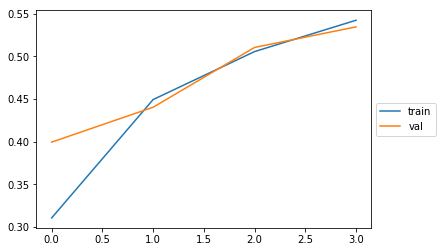

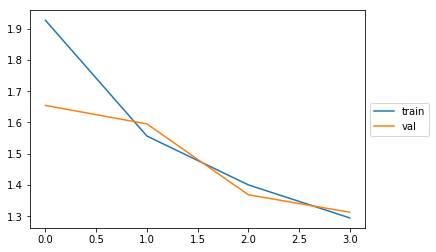

In [5]:
x = range(epochs)
plt.plot(x, res.history['acc'], label='train')
plt.plot(x, res.history['val_acc'], label='val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label='train')
plt.plot(x, res.history['val_loss'], label='val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

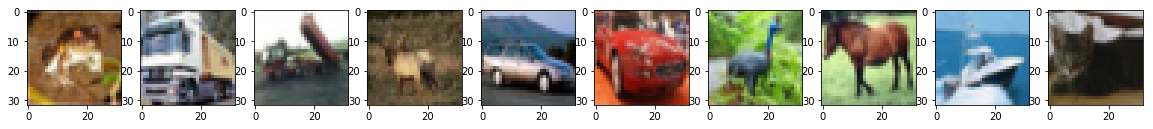

In [7]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i], 1, show_size, i+1)
plt.show()

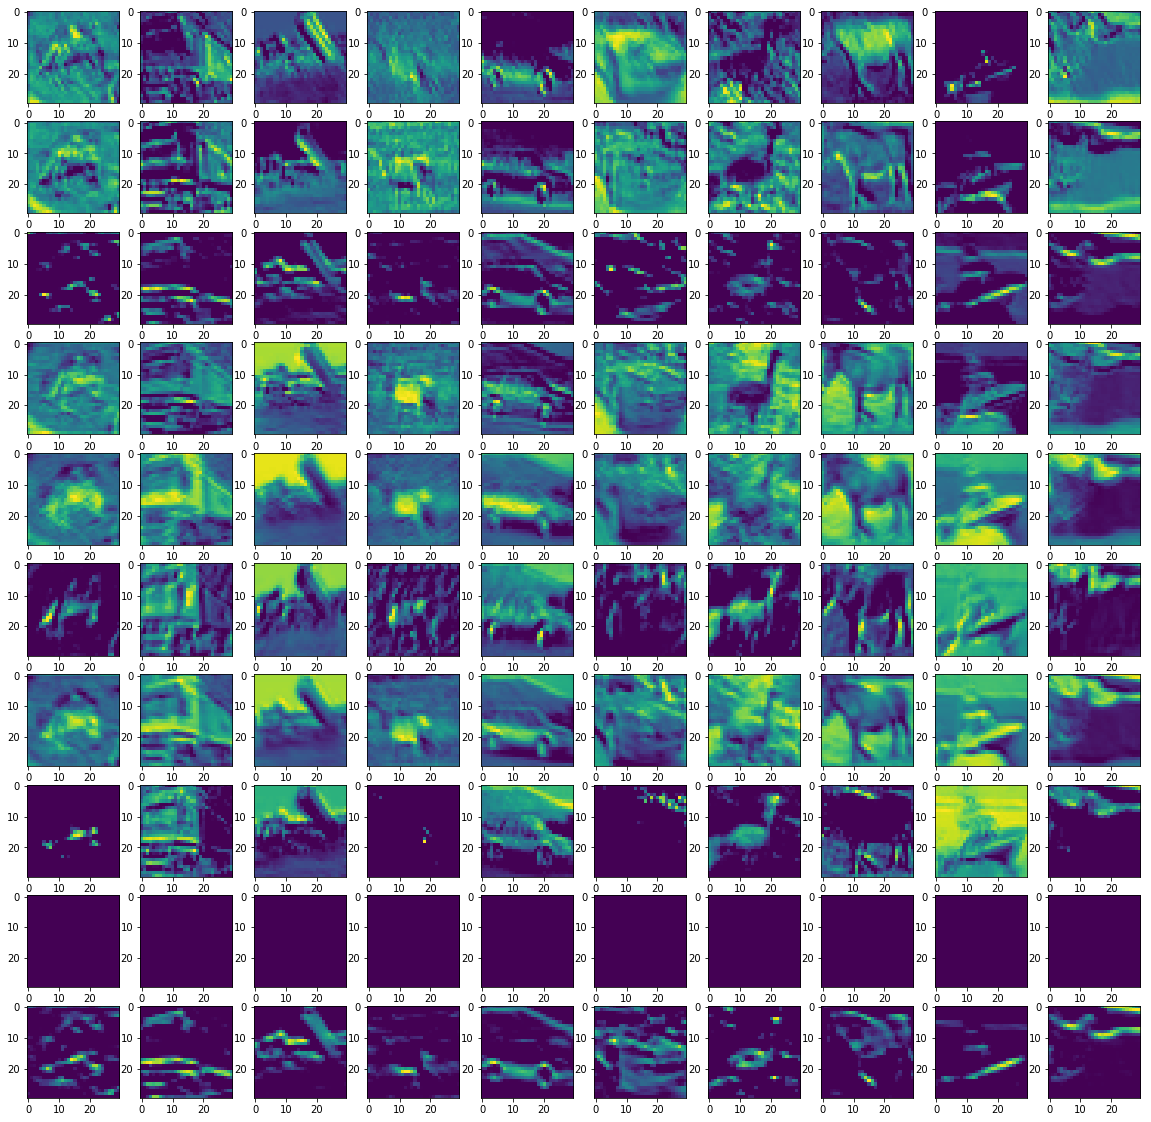

In [8]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 1, 2)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

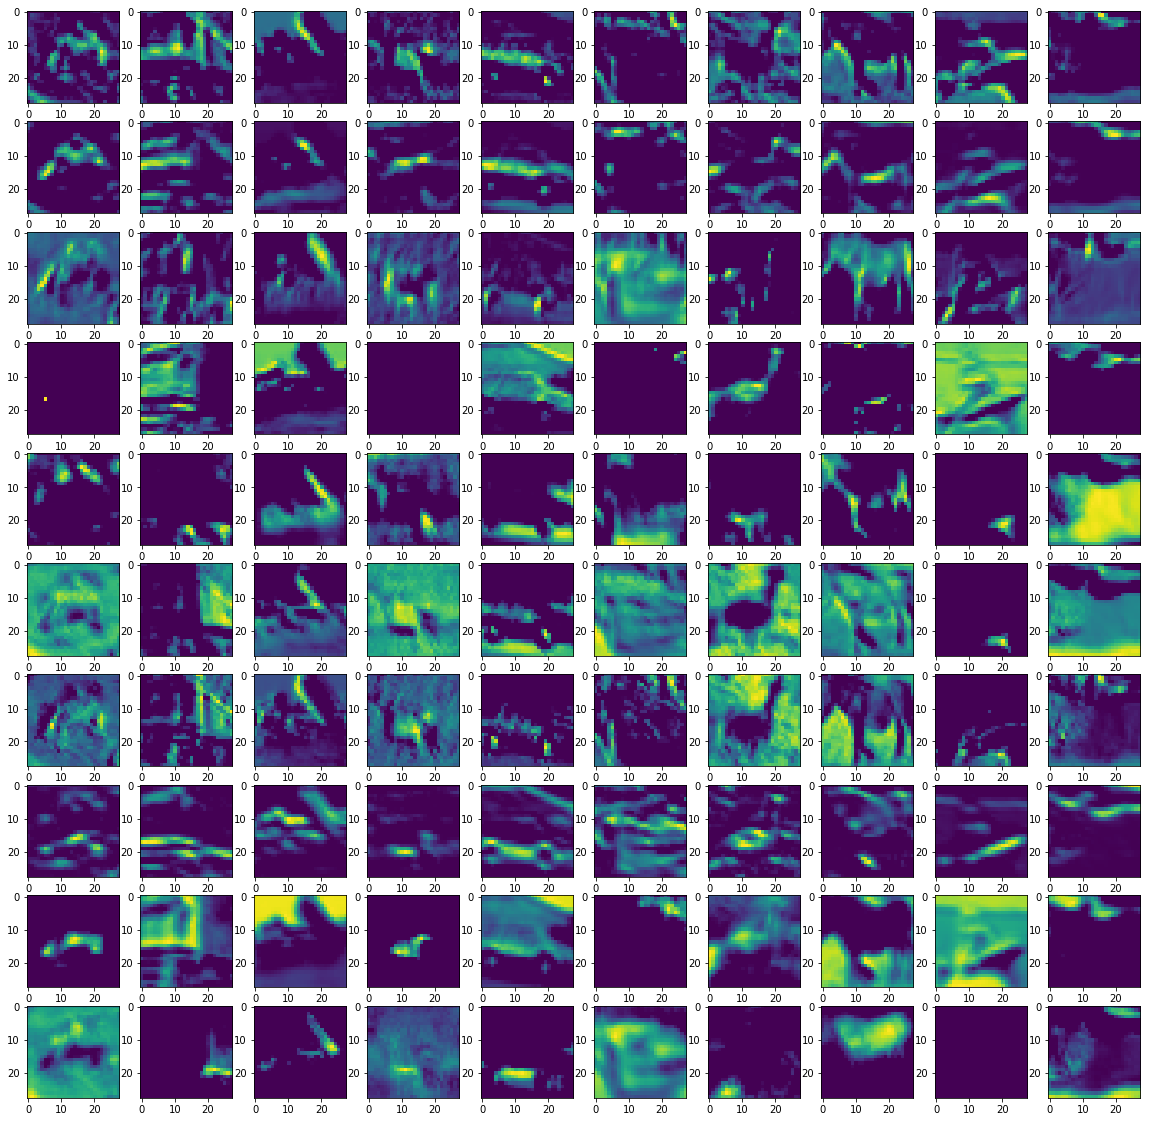

In [9]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 1, 2)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

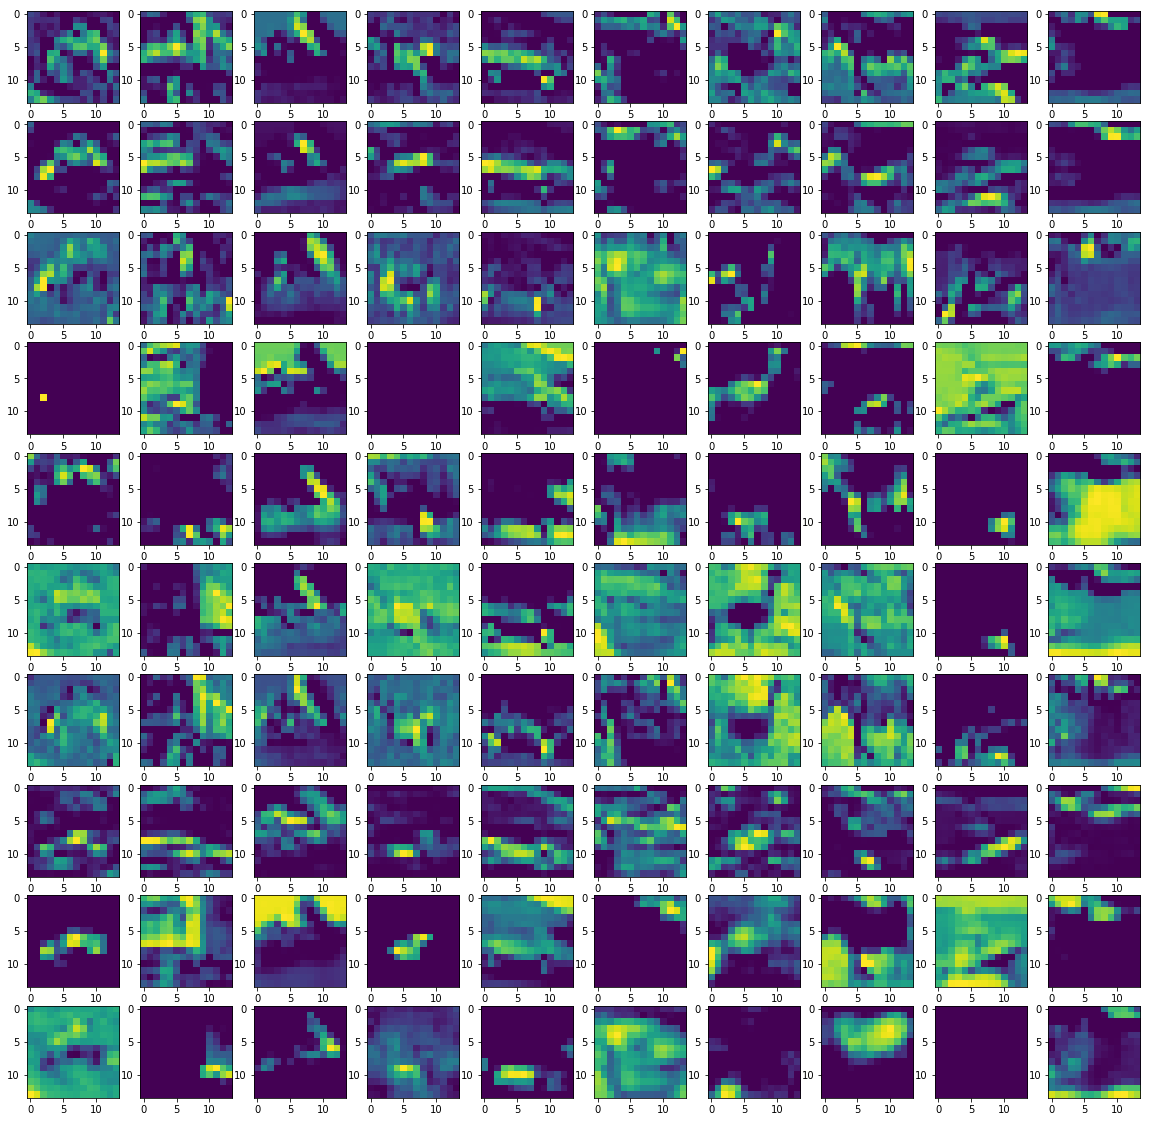

In [10]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 1, 2)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filter, show_size, pos)
plt.show()